# Implementing digital FIR filters in the lattice form

Lab 7, SDP

## 1 Objective

The students should become familiar with *lattice*-type realization
structure used for implementing FIR filters.

## 2 Theoretical notions

Lattice form for an FIR filter of order 3:

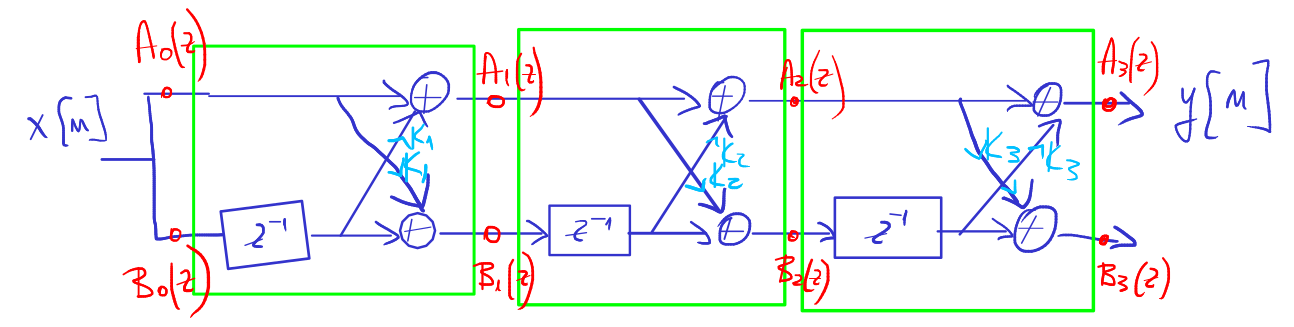

Equations:

$$\begin{aligned}
A_0(z) &= B_0(z) = 1 \\
A_m(z) &= A_{m-1}(z) + K_m \cdot z^{-1} \cdot B_{m-1}(z) \\
A_{m-1}(z) &= \frac{A_m(z) - K_m  \cdot B_m(z)}{1 - K_m^2} \\
B_m(z) &= z^{-m} B_m(z^{-1}) = \textrm{ like }A_m(z)\textrm{, with coefficients reversed}
\end{aligned}$$

These equations allow to convert $H(z)$ to the reflection coefficients
needed by the lattice implementation, or to find $H(z)$ from a given
lattice implementation.

## 3 Theoretical exercises

1.  Find the FIR filter coefficients in direct form, if the reflection
    coefficients of the lattice FIR structure are: $K_1 = \frac{1}{2}$,
    $K_2 = 0.6$, $K_3 = -0,7$, $K_4 = \frac{1}{3}$.

2.  Find the reflection coefficients of the lattice structure for a FIR
    filter with system function:
    $$H(z) = 1 + \frac{2}{5}z^{-1} + \frac{7}{20}z^{-2} + \frac{1}{2}z^{-3}$$

## 4 Practical exercises

1.  In Matlab, use the `fdatool` tool to design one of the following
    filters:

    1.  A low-pass FIR filter of order 5, equiripple type, with cutoff
        frequency around 5kHz (transition band from 4.8kHz to 5.2 kHz)
        at a sampling frequency of 44.1kHz;
    2.  A high-pass FIR filter of order 5, equiripple type, with cutoff
        frequency around 1kHz (transition band from 900Hz to 1.1 kHz) at
        a sampling frequency of 44.1kHz;
    3.  A band-pass FIR filter of order 5, equiripple type, with
        passband around 700Hz to 4Hz (transition bands from 600Hz to 800
        Hz, and from 3.9kHz to 4.1 kHz) at a sampling frequency of
        44.1kHz.

    Note: for this type of filter, `fdatool` requires not the cutoff
    frequency, but the limits of the transition band around that cutoff
    frequency.

2.  Export the filter coefficients to Matlab Workspace, with the name
    `Num`.

    Use the `tf2latc()` function from Matlab to convert the coefficients
    `Num` of the transfer function to coefficients of the *lattice*
    form. Name the resulting vector $K$ and display it.

    Afterwards, use the inverse function `latc2tf()` to convert the
    coefficients `K` of the *lattice* form back into coefficients of the
    direct forms, and check that we obtain the same values as in `Num`.

    **Note 1**:

    -   It is possible that you get the following error when
        `tf2latc()`:

            Error using levdown
            At least one of the reflection coefficients is equal to one.
            The algorithm fails for this case.

        This happens because the vector `Num` is symmetrical (first
        coefficient equal to last, etc) (is a linear-phase filter).

        As a workaround, we must forcefully break the symmetry, for
        example by adding a small $\epsilon$ to the first coefficient:

        ``` matlab
        Num(1) = Num(1) + 0.0000001
        ```

    **Note 2**:

    -   Using `latc2tf()` you will not obtain back the same values as in
        `Num`, but instead the values divided to the first entry,
        `Num / Num(1)`. This is because the *lattice* form requires that
        the first coefficient of $H(z)$ is always 1.

        Therefore, the coefficients in `K` don’t actually implement the
        filter `Num`, but actually the filter `Num / Num(1)`. This means
        that in the Simulink model the input signal must first be passed
        through an additional Gain block with value `Num(1)`
        (i.e. $b_0$), before it is fed into the *lattice* structure.

3.  In Simulink, implement the FIR filter in *lattice* form.

    1.  Build the schematic, putting in the Gain blocks the coefficients
        from the vector `K` (`K(1)`, `K(2)`, etc)
    2.  At the output put a visualization block (“Scope”) and display
        the impulse response (input “Discrete Impulse”) and the step
        response (input “Step”).

4.  In Matlab, create a function to filter a vector `x` with a FIR
    system with known *lattice* coefficients `K`, obtaining the output
    vector `y`.

    Find a way to compute the output `y[n]` at some time moment `n`,
    based on the schematic. In other words, if we know the schematic,
    how can we implement it in the form of equations or lines of code?

    You can use the following guiding template:

    ``` matlab
    function y = filter_lattice_FIR(K, x)
    % Filter the vector x with a lattice FIR filter with coefficients K

    ord = length(K);

    % Write code here:

    for i=1:length(x)
       y(n) = ... 
    end


    end
    ```

5.  Test this function, by calling it with the coefficients `K` of the
    filter above, using an input signal `x` as follows:

    1.  a vector with one 1 followed by 19 zeros (unit impulse)
    2.  a vector with 20 values of 1 (unit step)

    Plot the resulting vectors with `stem()`.

## 5 Final questions

1.  TBD